# Principal Component Analysis

In [1]:
%matplotlib inline

import numpy as np
from numpy import cos, sin, deg2rad, rad2deg

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import sklearn.decomposition

sns.set_style('darkgrid')
np.random.seed(42)

## Data: 2D Gaussian 

2D data created by sampling from a 2D Gaussian distribution. The [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) $\Sigma$ of the Gaussian distribution is given by a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix) $R$ that rotatates around an angle $\theta$ and scale matrix $S$.

$$
R = \begin{bmatrix}
    \cos \theta & -\sin \theta \\
    \sin \theta & \cos \theta \\
    \end{bmatrix}
$$

$$
S = \begin{bmatrix}
    s_x & 0 \\
    0 & s_y \\
    \end{bmatrix}
$$

The covariance matrix $\Sigma$ is then given by:

$$
\Sigma = RSSR^{-1}
$$

Note that $R$ will be the eigenvector matrix and $SS$ will be the eigenvalue matrix.

In [2]:
mean = (0., 0.)  # Mean

# Covariance from rotation and scale matrix
theta = deg2rad(30)
R = np.asarray([
    [cos(theta), -sin(theta)],
    [sin(theta),  cos(theta)],
])
scale = (1.2, 0.5)
S = np.diag(scale)
# Covariance matrix
cov = R @ S @ S @ R.T

# Sample from distribution
n = 250  # Number of samples
X = np.random.multivariate_normal(mean, cov, n)

PCA ([principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)) helps us find the principal components of a dataset. These principal components are linearly uncorrelated variables of which the first principal component has the largest possible variance, and each successive component explains the highest variance on the remaining dimensions with the constraint that it's ortogonal to all previous components.

The principal components are the [eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of the [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) of the dataset and the eigenvalues determine their magnitude.

The empirical covariance matrix $\Sigma_X$ of dataset $\mathbf{X}$ with $n$ samples is defined as:

$$
\Sigma_X = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)
$$

Then the eigenvectors $V$ and eigenvalues $S$ are defined as:

$$
\Sigma_X = V^T S V
$$

Use the [sklearn PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) functionality to compute the principal components. Alternatively the [`numpy.linalg.eig`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) or the [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) functions can be used to get the eigenvectors and eigenvalues.

In [3]:
# Empirical ovariance matrix
cov_X = np.cov(X.T)

print('True covariance matrix:\n\t{:.2f}  {:.2f}\n\t{:.2f}  {:.2f}'.format(
    *cov.flatten()))
print('Empirical covariance matrix:\n\t{:.2f}  {:.2f}\n\t{:.2f}  {:.2f}'.format(
    *cov_X.flatten()))


# PCA decomposition by sklearn
pca = sklearn.decomposition.PCA()
pca.fit(X)

# Show that covariance matrix can be reconstruted from the PCA components
assert np.allclose(
    (pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_),
    cov_X)

True covariance matrix:
	1.14  0.52
	0.52  0.55
Empirical covariance matrix:
	1.14  0.52
	0.52  0.53


We can recover the original rotation by calling the [atan2](https://en.wikipedia.org/wiki/Atan2) function on the first eigenvector (first component).

$$
\theta_X = arctan\left(\frac{y}{x}\right) = arctan\left(\frac{r \sin \theta}{r \cos \theta}\right)
$$

In [4]:
theta_X = np.arctan2(pca.components_[0,1], pca.components_[0,0])
print('Empirical rotation angle = {:.2f} degrees'.format(rad2deg(theta_X)))

Empirical rotation angle = 29.68 degrees


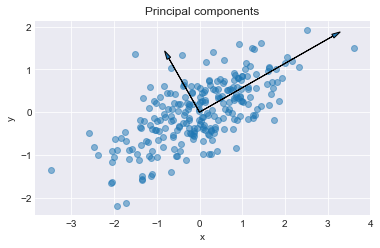

In [5]:
# Plot the components scaled according to the explained variance
# Scale shown is 3 times the standard deviation
scaled_vectors = np.diag(3 * np.sqrt(pca.explained_variance_)) @ pca.components_

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x=X[:,0], y=X[:,1], alpha=0.5)
ax.arrow(0, 0, scaled_vectors[0,0], scaled_vectors[0,1], head_width=0.1, head_length=0.2)
ax.arrow(0, 0, scaled_vectors[1,0], scaled_vectors[1,1], head_width=0.1, head_length=0.2)
ax.set_title('Principal components')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')

plt.show()

The PCA transformation transforms the data so that the first principal component follows the x-axis and the second principal component follows the y-axis (next one orthogonal to x).

The resulting transformation can also be scaled with the eigenvalues so the resulting data is uncorrelated and has standard-deviation 1 in every component:

$$
X_t = X V_T \frac{1}{\sqrt{S}}
$$

Note that $S$ has the variances.

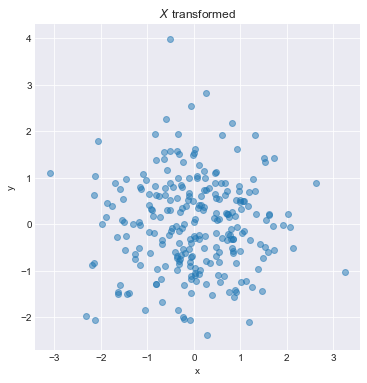

In [6]:
# Transform (rotate and scale)
Xt = X @ pca.components_.T @ np.diag(1/np.sqrt(pca.explained_variance_))
# `X @ pca.components_.T` should be same as pca.transform(X)
assert np.allclose(
    X @ pca.components_.T,
    pca.transform(X),
    atol=1e-02
    )

# Show transformed (rotated + scaled)
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x=Xt[:,0], y=Xt[:,1], alpha=0.5)
ax.set_title('$X$ transformed')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.show()